In [87]:
# importing all libraries first
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [88]:
# loading the dataset
file_path = "Leading Causes Of Death NO United States AND NO All Causes.csv"
df = pd.read_csv(file_path)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Loads the dataset
file_path = "Leading Causes Of Death NO United States AND NO All Causes.csv"
df = pd.read_csv(file_path)

# aggregating the top 10 causes of death
death_totals = (
    df.groupby("General Cause")["Deaths"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


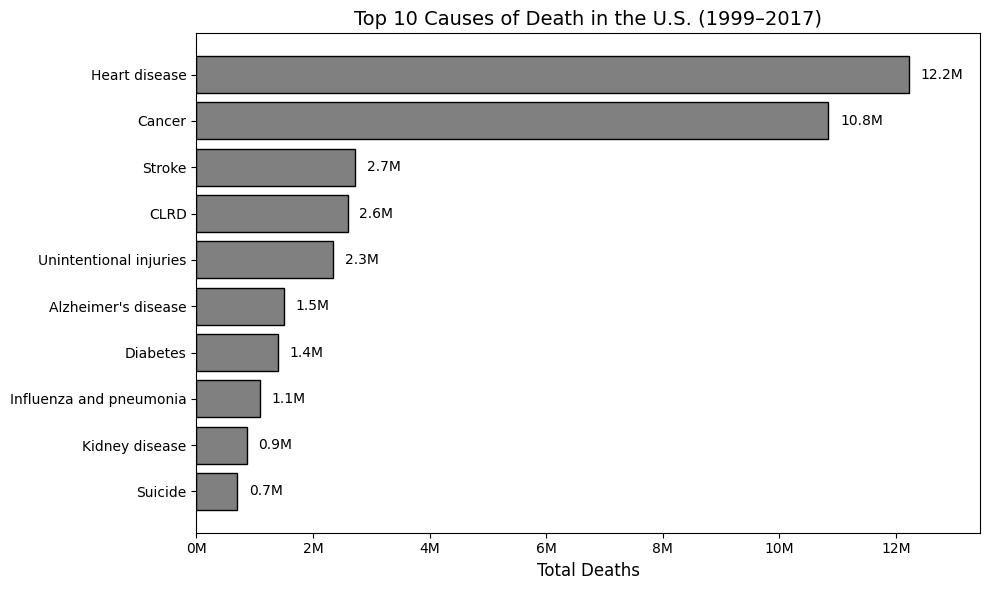

In [90]:
# Plotting the chart
plt.figure(figsize=(10, 6))
bars = plt.barh(death_totals.index[::-1], death_totals.values[::-1], color='gray', edgecolor='black')

# adding the values to the end of each bar in millions
for bar in bars:
    width = bar.get_width()
    label = f"{width/1_000_000:.1f}M"
    plt.text(width + 200_000, bar.get_y() + bar.get_height() / 2, label,
             va='center', ha='left', fontsize=10)

# formats x-axis as millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1_000_000)}M"))

# here is for the titles and labesls
plt.title("Top 10 Causes of Death in the U.S. (1999–2017)", fontsize=14)
plt.xlabel("Total Deaths", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# provides extra space to prevent label cutoff
plt.xlim(0, death_totals.max() * 1.1)

plt.tight_layout()
plt.show()


In [91]:
# first loading data set again (i like to load it again for each one)
df = pd.read_csv("Leading Causes Of Death NO United States AND NO All Causes.csv")

# Filtering
selected_causes = ["Heart disease", "Cancer", "Stroke", "CLRD", "Unintentional injuries"]
df_filtered = df[
    (df["General Cause"].isin(selected_causes)) &
    (df["Year"].between(1999, 2017))
]

# here i did grouping and pivoting for the map
df_avg = (
    df_filtered.groupby(["General Cause", "Year"])["Age-adjusted Death Rate"]
    .mean()
    .reset_index()
)
heatmap_data = df_avg.pivot(index="General Cause", columns="Year", values="Age-adjusted Death Rate")

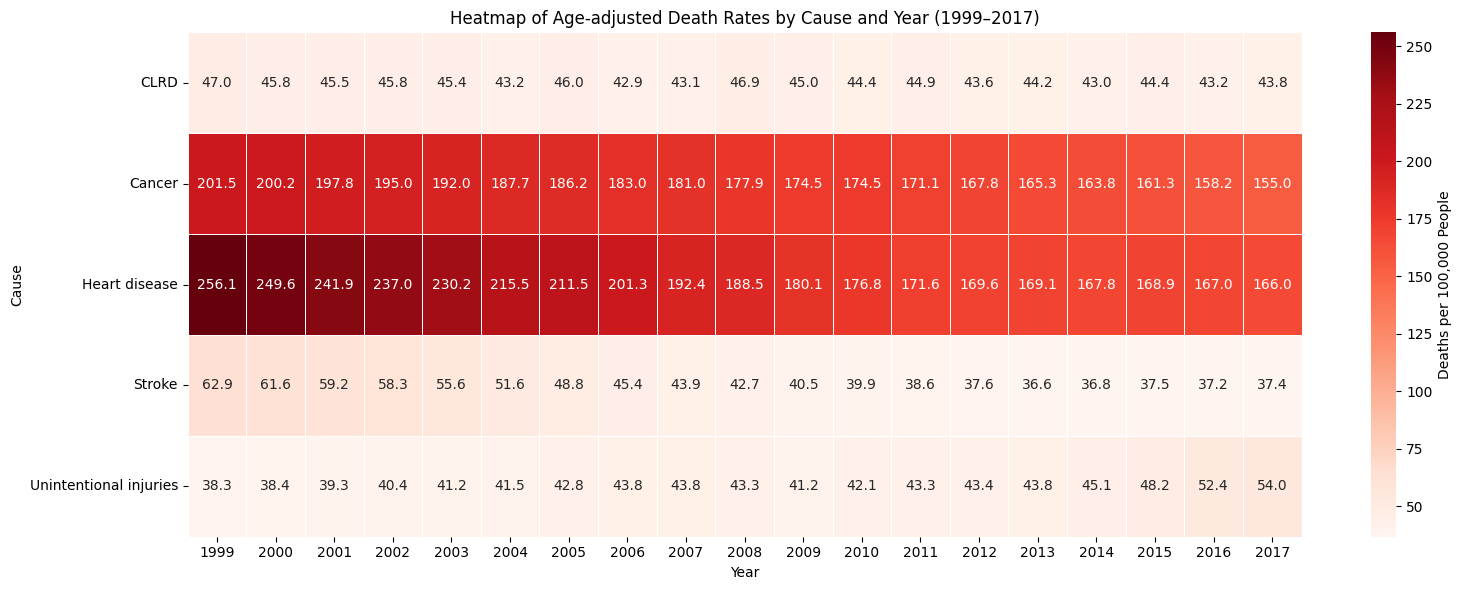

In [92]:
# plotting the heatmap here
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    linewidths=0.5,
    cbar_kws={'label': 'Deaths per 100,000 People'}
)

plt.title("Heatmap of Age-adjusted Death Rates by Cause and Year (1999–2017)")
plt.xlabel("Year")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


In [93]:
# loading the dataset
file_path = "Leading Causes Of Death NO United States AND NO All Causes.csv"
df = pd.read_csv(file_path)

# Filter for 1999–2017
df_10yr = df[df["Year"].between(1999, 2017)]

# Define top 5 causes
top_5_causes = ["Heart disease", "CLRD", "Diabetes", "Stroke", "Unintentional injuries"]

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# df_10yr is already filtered to years 1999–2017
# Define correct top 5 causes
top_5_causes = ["Heart disease", "Cancer", "Stroke", "CLRD", "Unintentional injuries"]

# Defines the 10 largest states by population
largest_states = ["California", "Texas", "Florida", "New York", "Pennsylvania",
                  "Illinois", "Ohio", "Georgia", "North Carolina", "Michigan"]

# Filtering data for those states and causes
filtered = df_10yr[
    df_10yr["State"].isin(largest_states) &
    df_10yr["General Cause"].isin(top_5_causes)
]


In [95]:
# Group by state and cause then average age-adjusted death rate
grouped = filtered.groupby(["State", "General Cause"])["Age-adjusted Death Rate"].mean().unstack().fillna(0)

# Set correct stacking order
cause_order = ["Heart disease", "Cancer", "Stroke", "CLRD", "Unintentional injuries"]
grouped = grouped[cause_order]

# Sort states by total rate and it looks better this way
grouped["Total"] = grouped.sum(axis=1)
grouped = grouped.sort_values("Total", ascending=False).drop(columns="Total")

<ipython-input-96-a4fd82424f35>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j, bottoms[j] + value / 2, f"{rounded_val}", ha='center', va='center', fontsize=10, color='white')


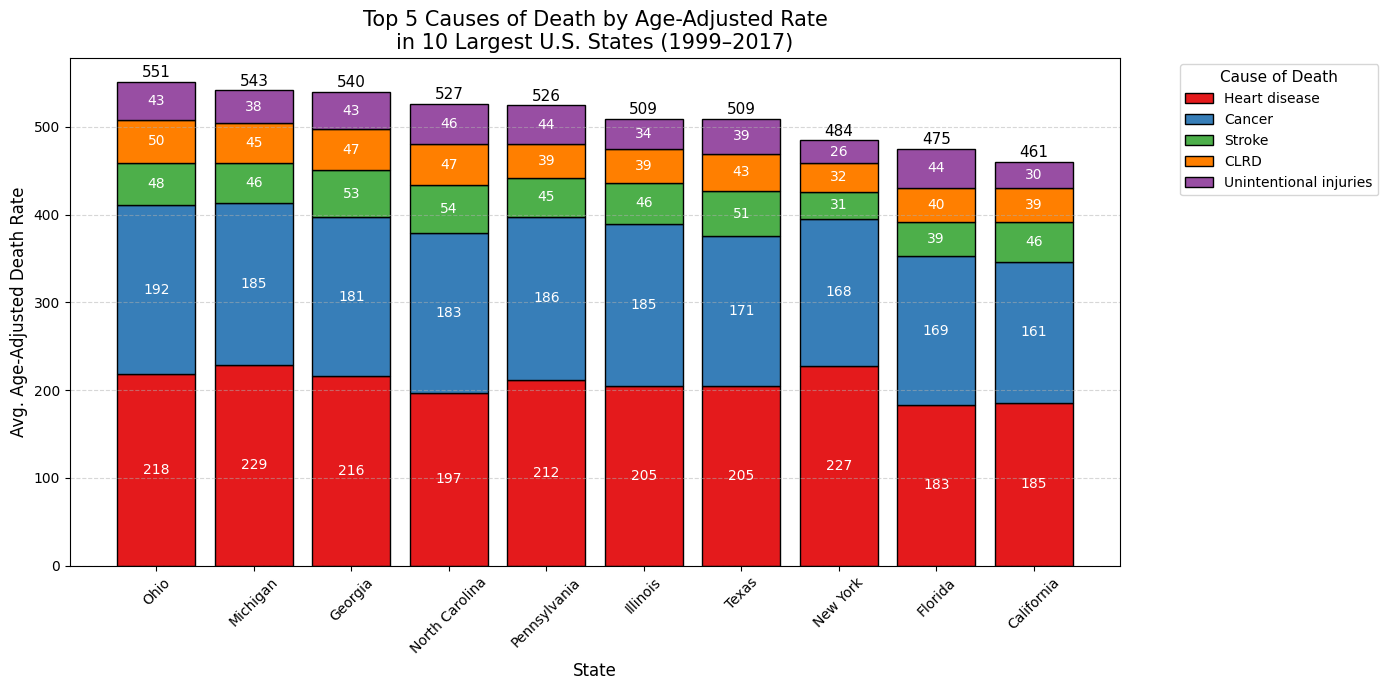

In [96]:
# Plotting
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#ff7f00", "#984ea3"]
fig, ax = plt.subplots(figsize=(14, 7))
bottoms = pd.Series([0] * len(grouped), index=grouped.index)

# Create a DataFrame to hold rounded values for total summing
rounded_labels = pd.DataFrame(0, index=grouped.index, columns=cause_order)

# Plot each segment
for i, cause in enumerate(cause_order):
    bar = ax.bar(grouped.index, grouped[cause], bottom=bottoms, color=colors[i], edgecolor='black', label=cause)

    for j, value in enumerate(grouped[cause]):
        rounded_val = round(value)
        rounded_labels.loc[grouped.index[j], cause] = rounded_val

        if value > 8:
            ax.text(j, bottoms[j] + value / 2, f"{rounded_val}", ha='center', va='center', fontsize=10, color='white')

    bottoms += grouped[cause]

# Add total values at the top
total_rounded = rounded_labels.sum(axis=1)
for i, total in enumerate(total_rounded):
    ax.text(i, bottoms.iloc[i] + 2, f"{total}", ha='center', va='bottom', fontsize=11)

# Titles and styling
ax.set_title("Top 5 Causes of Death by Age-Adjusted Rate\nin 10 Largest U.S. States (1999–2017)", fontsize=15)
ax.set_ylabel("Avg. Age-Adjusted Death Rate", fontsize=12)
ax.set_xlabel("State", fontsize=12)
ax.set_xticks(range(len(grouped.index)))
ax.set_xticklabels(grouped.index, rotation=45, fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title="Cause of Death", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


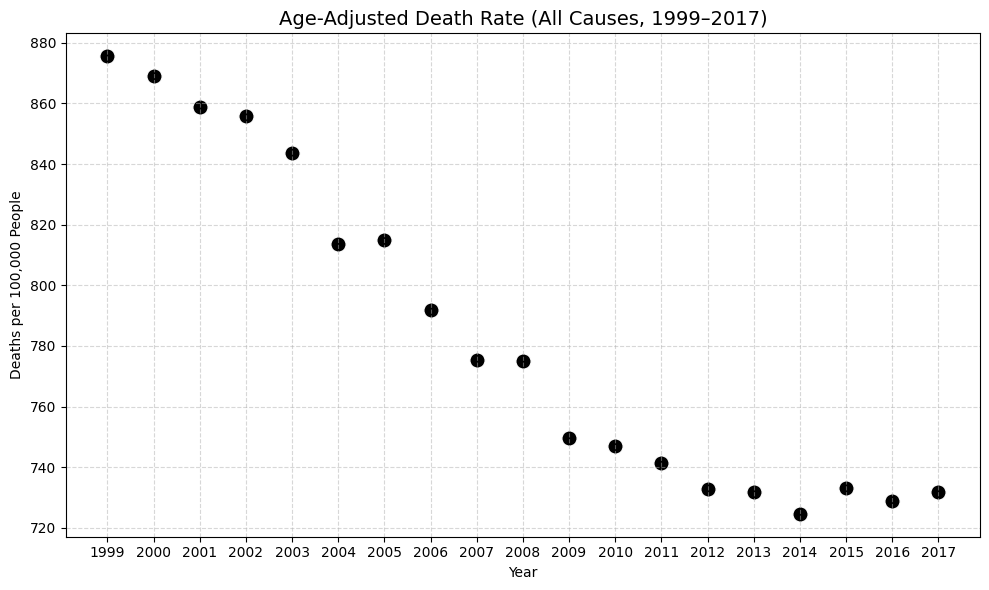

In [97]:
# Load the correct dataset
file_path = "Leading Causes of Death ALL Causes AND United States.csv"
df = pd.read_csv(file_path)

# Standardize column names (remove spaces just in case)
df.columns = df.columns.str.strip()

# Filter for 'All causes' and 2008–2017
df_all = df[(df["Year"].between(1999, 2017)) & (df["General Cause"] == "All causes")]

# Plot age-adjusted death rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x="Year", y="Age-adjusted Death Rate (All Death Causes)", s=120, color="black")

plt.title("Age-Adjusted Death Rate (All Causes, 1999–2017)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000 People")
plt.xticks(df_all["Year"])  # Show integer years
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


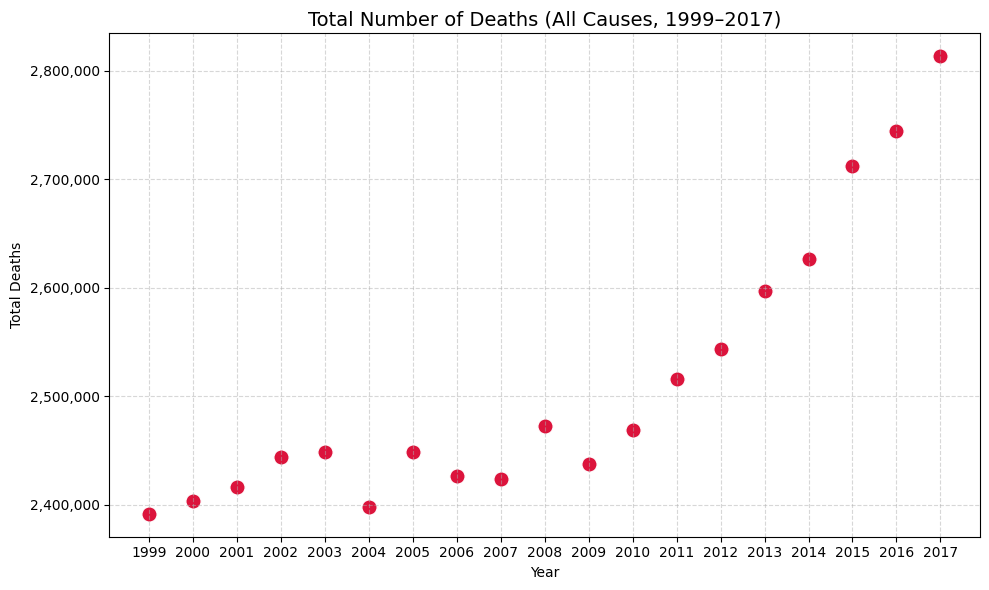

In [98]:
# Plot total number of deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x="Year", y="Deaths", s=120, color="crimson")

plt.title("Total Number of Deaths (All Causes, 1999–2017)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.xticks(df_all["Year"])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))  # Format with commas

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Leading Causes Of Death United States NOT States.csv")

# Define top 5 causes
top_5 = ["Heart disease", "Cancer", "Stroke", "CLRD", "Unintentional injuries"]

# Filter for 1999 and 2017
df_filtered = df[df["General Cause"].isin(top_5) & df["Year"].isin([1999, 2017])]

# Pivot table for comparison
pivot = df_filtered.pivot(index="General Cause", columns="Year", values="Deaths").reindex(top_5)

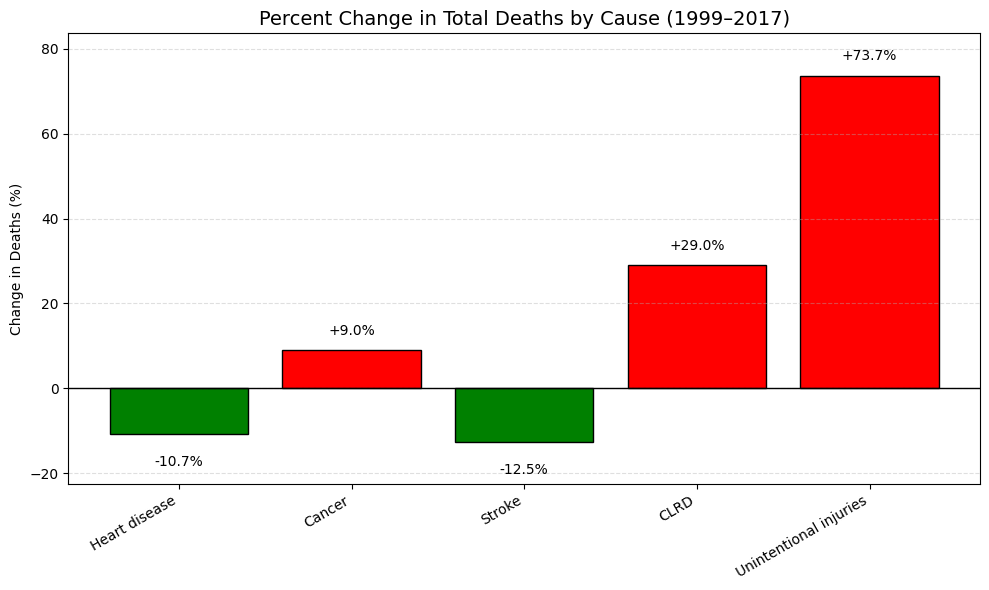

In [100]:
# Calculate percent change
pivot["Percent Change"] = ((pivot[2017] - pivot[1999]) / pivot[1999]) * 100

# Plot setup
colors = ["green" if x < 0 else "red" for x in pivot["Percent Change"]]
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot.index, pivot["Percent Change"], color=colors, edgecolor='black')

# Dynamically adjust y-limits based on max value
max_val = pivot["Percent Change"].max()
min_val = pivot["Percent Change"].min()
plt.ylim(min_val - 10, max_val + 10)

# Add percent labels
for bar in bars:
    height = bar.get_height()
    y_pos = height + 3 if height >= 0 else height - 5
    label = f"{height:+.1f}%"
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, label,
             ha='center', va='bottom' if height >= 0 else 'top', fontsize=10)

# Final styling
plt.title("Percent Change in Total Deaths by Cause (1999–2017)", fontsize=14)
plt.ylabel("Change in Deaths (%)")
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.axhline(0, color='black', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Leading Causes Of Death NO United States AND NO All Causes.csv"
df = pd.read_csv(file_path)

# Define top 5 causes and filter for 1999 and 2017
top_5 = ["Heart disease", "Cancer", "Stroke", "CLRD", "Unintentional injuries"]
df_filtered = df[df["General Cause"].isin(top_5) & df["Year"].isin([1999, 2017])]

# Compute average age-adjusted death rate per cause/year
grouped = df_filtered.groupby(["General Cause", "Year"])["Age-adjusted Death Rate"].mean().unstack()

# Calculate percent change from 1999 to 2017
grouped["% Change"] = ((grouped[2017] - grouped[1999]) / grouped[1999]) * 100
grouped = grouped.sort_values("% Change")

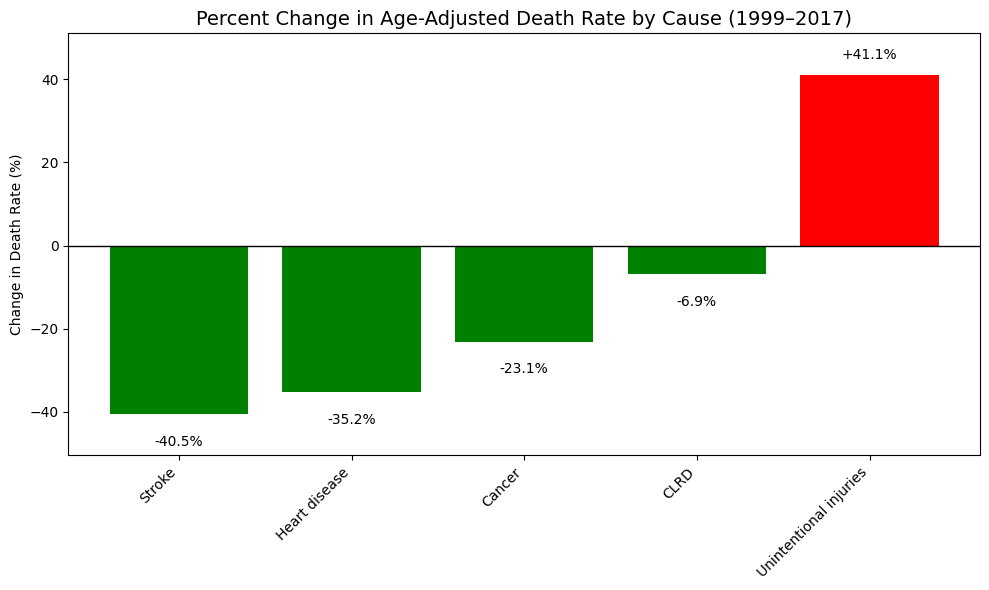

In [102]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x < 0 else 'red' for x in grouped["% Change"]]
bars = ax.bar(grouped.index, grouped["% Change"], color=colors)

# extended the y-axis to give space for labels and show 50% reference
max_val = grouped["% Change"].max()
min_val = grouped["% Change"].min()
ax.set_ylim(min_val - 10, max(max_val + 10, 50))

# adding labels just outside bars
for bar, pct in zip(bars, grouped["% Change"]):
    height = bar.get_height()
    offset = 3 if height > 0 else -5
    va = 'bottom' if height > 0 else 'top'
    ax.text(bar.get_x() + bar.get_width() / 2, height + offset,
            f"{pct:+.1f}%", ha='center', va=va, fontsize=10)

# adding reference lines
ax.axhline(0, color='black', linewidth=1)

# styling and the labels
ax.set_title("Percent Change in Age-Adjusted Death Rate by Cause (1999–2017)", fontsize=14)
ax.set_ylabel("Change in Death Rate (%)")
ax.set_xticks(range(len(grouped)))
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()